***Disclaimer**: This notebook does not include lemmatizing - I forgot to include it originally and haven't updated it yet. Also it doesn't include grid search for sentiment analysis as other contributer has done this already*

# Day 1 - Hugo's Notebook

First thing is to load all the packages into this notebook :)

In [1]:
import pandas as pd
import numpy as np

## Working with Preprocessed Data

The first step is to load the data into the notebook.

1. BIS Data

In [2]:
#Load the BIS Data
bis_data = pd.read_csv('raw_data/Pre_Processed/Pre_Processed_BIS_Data.txt', header=0)

In [3]:
print("BIS Data Preview:")
bis_data.head()

BIS Data Preview:


,Unnamed: 0,Parsed_Text,Speaker,Date,Sentence_Rank
0,0,id like to thank the conference organisers for...,Jan Frait,17 Mar 2023,0.0
1,1,the knowledge i gained from my discussions her...,Jan Frait,17 Mar 2023,1.0
2,2,at conferences central bankers these days tend...,Jan Frait,17 Mar 2023,2.0
3,3,but for this conference for the first time in ...,Jan Frait,17 Mar 2023,3.0
4,4,this will hopefully better enable me to convey...,Jan Frait,17 Mar 2023,4.0


In [4]:
bis_data.tail()

,Unnamed: 0,Parsed_Text,Speaker,Date,Sentence_Rank
1677323,1677323,needless\nto say that is just as true today an...,0,06 Jan 1997,119.0
1677324,1677324,but the fact that the bundesbank isattested a ...,0,06 Jan 1997,120.0
1677325,1677325,that verdict has been confirmed time and again...,0,06 Jan 1997,121.0
1677326,1677326,hence thebundesbank will also continue to feel...,0,06 Jan 1997,122.0
1677327,1677327,bis review 1411996,0,06 Jan 1997,123.0


2. ECB Data

In [5]:
# Load ECB Data
ecb_data = pd.read_csv('raw_data/Pre_Processed/Pre_Processed_ECB_Data.txt', header=0)

In [6]:
print("\nECB Data Preview:")
ecb_data.head()


ECB Data Preview:


,Unnamed: 0,Parsed_Text,Speaker,Date,Sentence_Rank
0,0,speech the euro area hiking cycle an interi...,Philip R. Lane,2023-02-16,0.0
1,1,christopher dow had a distinguished career as ...,Philip R. Lane,2023-02-16,1.0
2,2,1 moreover he extensively analysed my topic to...,Philip R. Lane,2023-02-16,2.0
3,3,2 while the current inflation environment is q...,Philip R. Lane,2023-02-16,3.0
4,4,my aim today is to provide an interim analysis...,Philip R. Lane,2023-02-16,4.0


3. FED Data

In [7]:
# Load FED Data
fed_data = pd.read_csv('raw_data/Pre_Processed/Pre_Processed_FED_Data.txt', header=0, engine='python')

In [8]:
print("\nFED Data Preview:")
fed_data.head()


FED Data Preview:


,Unnamed: 0,Parsed_Text,Speaker,Date,Location,Doc_ID,Sentence_Rank
0,0,for release on delivery900 am estapril 26 1986...,"Johnson, Manuel H.",1986-04-26,Florida,1.0,0.0
1,1,april 26 1986 remarks by manuel h johnson memb...,"Johnson, Manuel H.",1986-04-26,Florida,1.0,1.0
2,2,it is also an opportunity for graduates their ...,"Johnson, Manuel H.",1986-04-26,Florida,1.0,2.0
3,3,if i may ifd like to take this opportunity off...,"Johnson, Manuel H.",1986-04-26,Florida,1.0,3.0
4,4,when the freshman class entered college in the...,"Johnson, Manuel H.",1986-04-26,Florida,1.0,4.0


## Working with Labelled Data

### Audience Classified Data

In [9]:
#Load the BIS Data
bis_data_aud = pd.read_csv('raw_data/Labelled/Audiences/BIS_prelabelled.txt', header=0)

In [10]:
bis_data_aud.head()

,Unnamed: 0,Parsed_Text,label
0,0,the unemployment rate last year averaged just ...,0
1,1,in addition the end of extended unemployment i...,0
2,2,for persons with only a high school diploma bo...,0
3,3,but once the shortterm unemployed pool is depl...,0
4,4,this is almost the same level as the structura...,0


In [11]:
#Load the ECR Data
ecb_data_aud = pd.read_csv('raw_data/Labelled/Audiences/ECB_prelabelled.txt', header=0)

In [12]:
ecb_data_aud.head()

,Unnamed: 0,Parsed_Text,label
0,0,strong labour markets with the unemployment r...,0
1,1,ecb staff analyses find that while participati...,0
2,2,it found that households anticipate their real...,0
3,3,in march the euro area unemployment rate and t...,0
4,4,at an aggregate level the ongoing reduction in...,0


In [13]:
#Load the FED Data
fed_data_aud = pd.read_csv('raw_data/Labelled/Audiences/FED_prelabelled.txt', header=0, engine='python')

In [14]:
fed_data_aud.head()

,Parsed_Text,label
0,and the federal reserves commitment to price s...,4.0
1,i believe that your efforts and this constitut...,3.0
2,shortterm capital flowed from canada to the un...,3.0
3,given the explosive growth in telephone traffi...,0.0
4,that doesnt mean that the feds paperbased busi...,4.0


### Sentiment Classified Data

In [15]:
bis_data_sent = pd.read_csv('raw_data/Labelled/Sentiment/BIS_prelabelled_sent.txt', header=0)

In [16]:
bis_data_sent.head()

,text,sentiment
0,this growth is expected to accelerate further ...,1
1,as integration increases national securities m...,1
2,improving skills provides a way to do this bec...,1
3,in fact the bank has for many years taken a br...,1
4,the sukuk market in particular has become an i...,1


In [17]:
ecb_data_sent = pd.read_csv('raw_data/Labelled/Sentiment/ECB_prelabelled_sent.txt', header=0)

In [18]:
ecb_data_sent.head()

,text,sentiment
0,target2 is seen as a tool to promote the furth...,1
1,the slovak republic for example is now home to...,1
2,the earlier this happens the earlier economic ...,1
3,the bank has made essential contributions in k...,1
4,moreover the economic size and welldeveloped f...,1


In [19]:
fed_data_sent = pd.read_csv('raw_data/Labelled/Sentiment/FED_prelabelled_sent.txt', header=0)
fed_data_sent = fed_data_sent.drop('audience', axis=1)

In [20]:
fed_data_sent.head()

,text,sentiment
0,governmental policy including that of the fede...,0
1,in light of the difficulties and uncertainties...,0
2,this means keeping the federal funds rate at i...,1
3,any decision to move in this direction therefo...,1
4,6the developments in the payments area are par...,0


## Sentiment Classification

Importing necessary libraries for ML

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [29]:
# Merging the audience dataframes
sentiment_data = pd.concat([fed_data_sent, ecb_data_sent, bis_data_sent])
sentiment_data = sentiment_data.reset_index(drop=True)
sentiment_data.head()

,text,sentiment
0,governmental policy including that of the fede...,0
1,in light of the difficulties and uncertainties...,0
2,this means keeping the federal funds rate at i...,1
3,any decision to move in this direction therefo...,1
4,6the developments in the payments area are par...,0


In [129]:
# Defining X and y
X = sentiment_data['text']
y = sentiment_data['sentiment']

In [134]:
# Load the stopwords from NLTK
stop_words = set(stopwords.words('english'))

In [136]:
# Training and test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

### Naive Bayes

In [90]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

Sergio ran a grid search resulting with best params:Best Naive Bayes Parameters: {'alpha': 0.5}

In [142]:
nb_pipeline = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB(alpha=0.5)
    )

In [92]:
nb_cv_results = cross_validate(nb_pipeline, X_train, y_train, cv=5, scoring = ['average_precision'])

In [93]:
nb_cv_ap = np.round(nb_cv_results["test_average_precision"].mean(),2)
print(f'Avg Precision Naive Bayes: {nb_cv_ap}')

Avg Precision Naive Bayes: 0.9


In [94]:
nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_test)

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='weighted')
nb_recall = recall_score(y_test, y_pred, average='weighted')
nb_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1:.2f}")

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.83


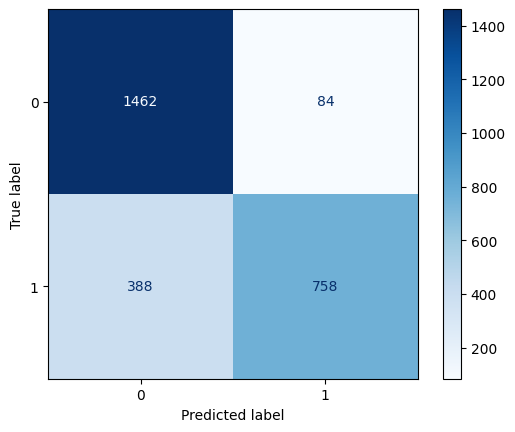

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

##CLASSIFICATION REPORT

### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np

Sergio ran a grid search resulting with best params: Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}

In [143]:
# Define the Random Forest pipeline
rf_pipeline = make_pipeline(
    TfidfVectorizer(),
    RandomForestClassifier(max_depth=None, min_samples_split=5, n_estimators=300)
)

In [112]:
# Cross-validation
rf_cv_results = cross_validate(rf_pipeline, X_train, y_train, cv=5, scoring=['average_precision'])

In [113]:
# Average precision
rf_cv_ap = np.round(rf_cv_results["test_average_precision"].mean(), 2)
print(f'Avg Precision Random Forest: {rf_cv_ap}')

Avg Precision Random Forest: 0.85


In [114]:
# Fit the model
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

In [148]:
# Calculate accuracy, precision, recall, and F1-score
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.83


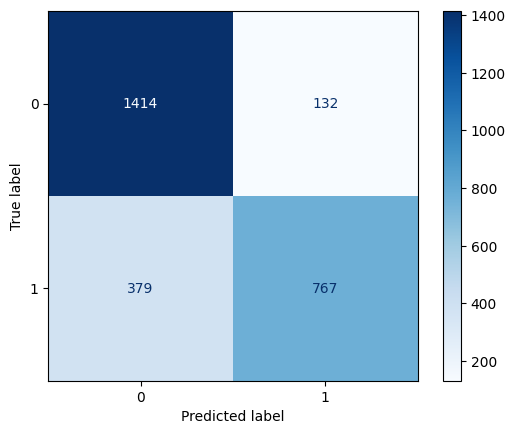

In [117]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Support Vector Machine

In [118]:
from sklearn.svm import SVC

Sergio ran a grid search resulting with best params: Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [141]:
# Define the SVM pipeline
svm_pipeline = make_pipeline(
    TfidfVectorizer(),
    SVC(probability=True, C=10, gamma='scale', kernel='rbf')
)

In [120]:
# Cross-validation
svm_cv_results = cross_validate(svm_pipeline, X_train, y_train, cv=5, scoring=['average_precision'])

# Average precision
svm_cv_ap = np.round(svm_cv_results["test_average_precision"].mean(), 2)
print(f'Avg Precision SVM: {svm_cv_ap}')

Avg Precision SVM: 0.89


In [121]:
# Fit the model
svm_pipeline.fit(X_train, y_train)
y_pred = svm_pipeline.predict(X_test)

In [150]:
# Calculate accuracy, precision, recall, and F1-score
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1 Score: {svm_f1:.2f}")

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.83


### Comparison Table

In [152]:
data = {
    'Model': ['SVM', 'RF', 'NB'],
    'Precision': [svm_precision, rf_precision, nb_precision],
    'Recall': [svm_recall, rf_recall, nb_recall],
    'F1': [svm_f1, rf_f1, nb_f1]
}

# Convert the dictionary to a DataFrame
sent_results_table = pd.DataFrame(data)
sent_results_table

,Model,Precision,Recall,F1
0,SVM,0.838751,0.836553,0.834371
1,RF,0.838751,0.836553,0.834371
2,NB,0.838751,0.836553,0.834371


## Agent Classification

### Multiclass Precision Metric

In [182]:
from sklearn.metrics import precision_score, recall_score, f1_score

def multiclass_precision(y_true, y_pred):
    # Calculate precision for all classes
    precisions = precision_score(y_true, y_pred, average=None, zero_division=0)
    
    # Convert the precision scores to a list
    return precisions.tolist()

def multiclass_recall(y_true, y_pred):
    # Calculate recall for all classes
    recalls = recall_score(y_true, y_pred, average=None, zero_division=0)
    
    # Convert the recall scores to a list
    return recalls.tolist()

### Preparing the Data

In [183]:
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load the stopwords
stop_words = set(stopwords.words('english'))

# Merging the agent dataframes
agent_data = pd.concat([bis_data_aud, fed_data_aud, ecb_data_aud])
agent_data = agent_data.reset_index(drop=True)
agent_data = agent_data.drop(columns=['Unnamed: 0'])
agent_data = agent_data.dropna()

[nltk_data] Downloading package stopwords to /home/hugo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [184]:
# Defining X and y
X = agent_data['Parsed_Text']
y = agent_data['label']

# Training and test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

### Naive Bayes

In [185]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [186]:
# 1.3.2 Naive Bayes with Grid Search
nb_pipeline = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

In [187]:
nb_param_grid = {
    'multinomialnb__alpha': [0.1, 0.5, 1.0]
}
nb_grid_search = GridSearchCV(nb_pipeline, nb_param_grid, cv=5, scoring='accuracy')
nb_grid_search.fit(X_train, y_train)
y_pred_nb = nb_grid_search.predict(X_test)

In [188]:
nb_precision = multiclass_precision(y_test, y_pred_nb)
nb_recall = multiclass_recall(y_test, y_pred_nb)
nb_f1 = multiclass_f1(y_test, y_pred_nb)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")

Accuracy: 0.8545816733067729
Precision: [0.8493975903614458, 0.8946078431372549, 0.810981098109811, 0.9357541899441341, 0.8683651804670913]
Recall: [0.8481203007518797, 0.7849462365591398, 0.9375650364203955, 0.7808857808857809, 0.8313008130081301]


### SVM

In [191]:
from sklearn.svm import SVC

# Define the SVM pipeline
svm_pipeline = make_pipeline(
    TfidfVectorizer(),
    SVC(probability=True)
)

# Define the parameter grid for Grid Search
svm_param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear', 'rbf']
}

# Perform Grid Search with cross-validation
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_grid_search.predict(X_test)

# Calculate metrics
svm_precision = multiclass_precision(y_test, y_pred_svm)
svm_recall = multiclass_recall(y_test, y_pred_svm)
svm_f1 = multiclass_f1(y_test, y_pred_svm)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Print the results
print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")

SVM Accuracy: 0.9096945551128818
SVM Precision: [0.9046898638426626, 0.8934782608695652, 0.8881453154875717, 0.9761904761904762, 0.9271948608137045]
SVM Recall: [0.8992481203007519, 0.8838709677419355, 0.9667013527575442, 0.8601398601398601, 0.8800813008130082]
SVM F1 Score: None


### RF

In [192]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest pipeline
rf_pipeline = make_pipeline(
    TfidfVectorizer(),
    RandomForestClassifier()
)

# Define the parameter grid for Grid Search
rf_param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

# Perform Grid Search with cross-validation
b= GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_grid_search.predict(X_test)

# Calculate metrics
rf_precision = multiclass_precision(y_test, y_pred_rf)
rf_recall = multiclass_recall(y_test, y_pred_rf)
rf_f1 = multiclass_f1(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Random Forest F1 Score: {rf_f1}")

Random Forest Accuracy: 0.8894422310756972
Random Forest Precision: [0.8837920489296636, 0.874439461883408, 0.8629107981220657, 0.964769647696477, 0.9121338912133892]
Random Forest Recall: [0.869172932330827, 0.8387096774193549, 0.9562955254942768, 0.8298368298368298, 0.8861788617886179]
Random Forest F1 Score: None


In [2]:
rf_grid_search

NameError: name 'rf_grid_search' is not defined

### Comparison Table

In [197]:
import pandas as pd

# Initialize the data for the table
data = {
    'Model': ['Naive Bayes', 'Random Forest', 'SVM'],
    'Accuracy': [nb_accuracy, rf_accuracy, svm_accuracy],
    'Precision_0': [nb_precision[0], rf_precision[0], svm_precision[0]],
    'Precision_1': [nb_precision[1], rf_precision[1], svm_precision[1]],
    'Precision_2': [nb_precision[2], rf_precision[2], svm_precision[2]],
    'Precision_3': [nb_precision[3], rf_precision[3], svm_precision[3]],
    'Precision_4': [nb_precision[4], rf_precision[4], svm_precision[4]],
    'Recall_0': [nb_recall[0], rf_recall[0], svm_recall[0]],
    'Recall_1': [nb_recall[1], rf_recall[1], svm_recall[1]],
    'Recall_2': [nb_recall[2], rf_recall[2], svm_recall[2]],
    'Recall_3': [nb_recall[3], rf_recall[3], svm_recall[3]],
    'Recall_4': [nb_recall[4], rf_recall[4], svm_recall[4]]
}

# Convert the dictionary to a DataFrame
comparison_table = pd.DataFrame(data)

# Reformat the table to have the desired layout
comparison_table = comparison_table.set_index('Model')
comparison_table.columns = pd.MultiIndex.from_tuples([
    ('Accuracy', ''), 
    ('Precision', 'Class 0'), ('Precision', 'Class 1'), ('Precision', 'Class 2'), ('Precision', 'Class 3'), ('Precision', 'Class 4'),
    ('Recall', 'Class 0'), ('Recall', 'Class 1'), ('Recall', 'Class 2'), ('Recall', 'Class 3'), ('Recall', 'Class 4')
])

# Display the table
comparison_table


Accuracy Precision                                          \
                          Class 0   Class 1   Class 2   Class 3   Class 4   
Model                                                                       
Naive Bayes    0.854582  0.849398  0.894608  0.810981  0.935754  0.868365   
Random Forest  0.889442  0.883792  0.874439  0.862911  0.964770  0.912134   
SVM            0.909695  0.904690  0.893478  0.888145  0.976190  0.927195   

                 Recall                                          
                Class 0   Class 1   Class 2   Class 3   Class 4  
Model                                                            
Naive Bayes    0.848120  0.784946  0.937565  0.780886  0.831301  
Random Forest  0.869173  0.838710  0.956296  0.829837  0.886179  
SVM            0.899248  0.883871  0.966701  0.860140  0.880081